# Chapter 3. Classification

In [2]:
from sklearn.datasets import fetch_openml


In [6]:
mnist = fetch_openml('mnist_784')

mnist

In [7]:
 X, y = mnist["data"], mnist["target"]

In [8]:
X.shape


(70000, 784)

In [9]:
y.shape


(70000,)

### This is because each image is 28×28 pixels, and each feature simply represents one pixel’s intensity, from 0 (white) to 255 (black). Let’s take a peek at one digit from the dataset.

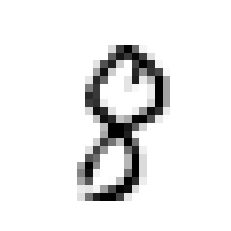

In [169]:
import matplotlib
import matplotlib.pyplot as plt
some_digit = X[38000]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation="nearest")
plt.axis("off") 
plt.show()

### 784 valuer reshape for 28 X 28

In [139]:
some_digit.shape

(784,)

In [140]:
some_digit_image.shape

(28, 28)

In [141]:
y[30000]

'3'

In [142]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

### Moreover, some learning algorithms are sensitive to the order of the training instances, and they perform poorly if they get many similar instances in a row.

In [143]:
import numpy as np
shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

## Training a Binary Classifier

In [170]:
y_train_8 = (y_train == 8) # True for all 5s, False for all other digits. 
y_test_8 = (y_test == 8)

In [171]:
y_train_8

array([False, False, False, ..., False, False, False])

In [172]:
y_test_8

array([False, False, False, ..., False, False, False])

In [175]:
y_train = y_train.astype(np.int8)
y_train_8 = (y_train == 8) # True for all 5s, False for all other digits. 
y_test_8 = (y_test == 8)

In [178]:
from sklearn.linear_model import SGDClassifier 
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_8)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

#### If not, then perhaps what happened is that you used fetch_openml() to download MNIST, and it returns labels as strings so when you defined y_train_5 = (y_train == 5), it results an array full of False. A solution is to cast y_train to int8: y_train = y_train.astype(np.int8) (which is what I do in the notebook, just after loading the dat

##### The SGDClassifier relies on randomness during training (hence the name “stochastic”). If you want reproducible results, you should set the random_state parameter.

In [181]:
sgd_clf.predict([some_digit])

array([ True])

In [113]:
from sklearn.linear_model import SGDClassifier 
sgd_clf = SGDClassifier(random_state=56)
sgd_clf.fit(X_train, y_train_9)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=56, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [114]:
sgd_clf.predict([some_digit])

array([False])

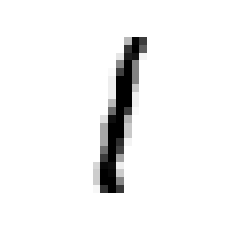

In [183]:
import matplotlib
import matplotlib.pyplot as plt
some_digit = X[42000]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation="nearest")
plt.axis("off") 
plt.show()

In [185]:
y_train_1 = (y_train == 1) # True for all 5s, False for all other digits. 
y_test_1 = (y_test == 1)

In [186]:
y_train_1

array([ True, False, False, ...,  True, False, False])

In [188]:
from sklearn.linear_model import SGDClassifier 
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_1)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [189]:
sgd_clf.predict([some_digit])

array([ True])

## Measuring Accuracy Using Cross-Validation

In [198]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3, random_state=42,shuffle=True)
for train_index, test_index in skfolds.split(X_train, y_train_1): 
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = (y_train_1[train_index])
    X_test_fold = X_train[test_index] 
    y_test_fold = (y_train_1[test_index])
    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred)) # prints 0.9502, 0.96565 and 0.96495


0.98935
0.9885
0.98905


#### cross_val_score() function to evaluate your SGDClassifier model using K-fold cross-validation, with three folds

In [199]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_1, cv=3, scoring="accuracy")

array([0.9877, 0.9845, 0.9876])

## Dumb Classifier example

In [205]:
from sklearn.base import BaseEstimator
class Never1Classifier(BaseEstimator): 
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [206]:
never_1_clf = Never1Classifier()

In [207]:
cross_val_score(never_1_clfclf, X_train, y_train_1, cv=3, scoring="accuracy")

array([0.8917, 0.8875, 0.8837])

![text](precision.png)

### This is simply because only about 10% of the images are 5s, so if you always guess that an image is not a 5, you will be right about 90% of the time

#### This demonstrates why accuracy is generally not the preferred performance measure for classifiers, especially when you are dealing with skewed(enviesado)datasets

## Confusion Matrix

In [210]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_1, cv=3)
    confusion_matrix(y_train_1, y_train_pred)

array([[52822,   436],
       [  368,  6374]])

![text](matrix-confusion.png)

#### An interesting one to look at is the accuracy of the positive predictions; this is called the precision of the classifier

![text](precision_value.png)

#### So precision is typically used along with another metric named recall, also called sensitivity or true positive rate (TPR): this is the ratio of positive instances that are correctly detected by the classifier

![text](recall.png)

![text](m-consufion-metrics.png)

## Precision and Recall

In [216]:
from sklearn.metrics import precision_score, recall_score
y_train_pred

array([ True, False, False, ...,  True, False, False])

In [222]:
y_train_1.shape

(60000,)

In [219]:
precision_score(y_train_1, y_train_pred)

0.9359765051395007

In [220]:
precision_score(y_train_1, y_train_pred)

0.9359765051395007

#### The F1 score is the harmonic mean of precision and recall . Whereas the regular mean treats all values equally, the harmonic mean gives much more weight to low values. As a result, the classifier will only get a high F1 score if both recall and precision are high.

In [223]:
from sklearn.metrics import f1_score
f1_score(y_train_1, y_train_pred)

0.9406729634002362

#### Increasing precision reduces recall, and vice versa. This is called the precision/recall tradeoff

## Precision/Recall Tradeoff

### For each instance, it computes a score based on a decision function, and if that score is greater than a threshold, it assigns the instance to the positive class, or else it assigns it to the negative class

![text](threshold.png)

In [224]:
y_scores = sgd_clf.decision_function([some_digit])

In [225]:
y_scores

array([5470.74180403])

### The SGDClassifier uses a threshold equal to 0, so the previous code returns the same result as the predict()

In [229]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)

In [230]:
y_some_digit_pred 

array([ True])


### This confirms that raising the threshold decreases recall

In [231]:
threshold = 200000

In [232]:
y_some_digit_pred = (y_scores > threshold)

In [233]:
 y_some_digit_pred

array([False])

#### The image actually represents a 1, and the classifier detects it when the threshold is 0, but it misses it when the threshold is increased to 200,000

In [234]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_1, cv=3, method="decision_function")

In [238]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_1, y_scores)

In [239]:
thresholds

array([-83899.39935762, -83896.96795245, -83895.57088894, ...,
        39831.92603558,  40088.52787154,  42276.60712765])

In [242]:

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds): 
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision") 
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall") 
    plt.xlabel("Threshold")
    plt.legend(loc="upper left") 
    plt.ylim([0, 1])

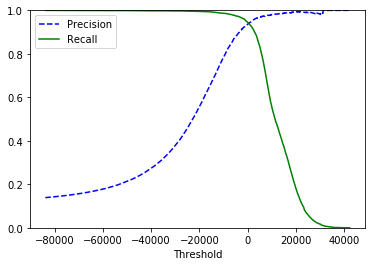

In [243]:
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

##### You may wonder why the precision curve is bumpier than the recall curve in Figure 3-4. The reason is that precision may sometimes go down when you raise the threshold (although in general it will go up). To understand why, look back at Figure 3-3 and notice what happens when you start from the central threshold and move it just one digit to the right: precision goes from 4/5 (80%) down to 3/4 (75%). On the other hand, recall can only go down when the threshold is increased, which explains why its curve looks smooth.

In [252]:
def plot_precision_recall(precisions, recalls): 
    plt.plot(recalls, precisions, "b--", label="Precision") 
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.ylim([0, 1])

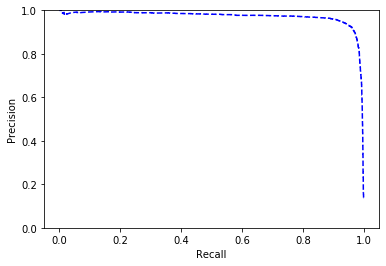

In [253]:
plot_precision_recall(precisions, recalls)

In [264]:
y_train_pred_90 = (y_scores > 5000)

In [265]:
precision_score(y_train_1, y_train_pred_90,zero_division=1)

0.9686854783207157

In [266]:
recall_score(y_train_1, y_train_pred_90,zero_division=1)

0.835063779293978

## The ROC Curve

### The receiver operating characteristic (ROC) curve is another common tool used with binary classifiers. It is very similar to the precision/recall curve, but instead of plotting precision versus recall, the ROC curve plots the true positive rate (another name for recall) against the false positive rate. The FPR is the ratio of negative instances that are incorrectly classified as positive.  It is equal to one minus the true negative rate, which is the ratio of negative instances that are correctly classified as negative. The TNR is also called specificity. Hence the ROC curve plots sensitivity (recall) versus 1 – specificity

In [268]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_1, y_scores)

In [270]:
tpr

array([0.00000000e+00, 1.48323939e-04, 1.05309997e-02, ...,
       9.99851676e-01, 1.00000000e+00, 1.00000000e+00])

In [271]:
thresholds

array([  42277.60712765,   42276.60712765,   31213.87065808, ...,
        -83896.96795245,  -83899.39935762, -254524.83617044])

In [272]:
def plot_roc_curve(fpr, tpr, label=None): 
    plt.plot(fpr, tpr, linewidth=2, label=label) 
    plt.plot([0, 1], [0, 1], 'k--') 
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate') 
    plt.ylabel('True Positive Rate')

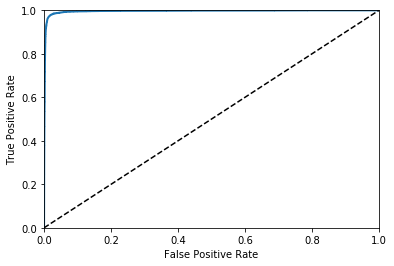

In [273]:
plot_roc_curve(fpr, tpr)

In [274]:
from sklearn.metrics import roc_auc_score

In [276]:
roc_auc_score(y_train_1, y_scores)

0.9958760413798227

#### Since the ROC curve is so similar to the precision/recall (or PR) curve, you may wonder how to decide which one to use. As a rule of thumb, you should prefer the PR curve whenever the positive class is rare or when you care more about the false positives than the false negatives, and the ROC curve otherwise. For example, looking at the previous ROC curve (and the ROC AUC score), you may think that the classifier is really good. But this is mostly because there are few positives (5s) compared to the negatives (non-5s). In contrast, the PR curve makes it clear that the classifier has room for improvement (the curve could be closer to the top-right corner).

In [277]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_1, cv=3,
method="predict_proba")

In [278]:
y_scores_forest = y_probas_forest[:, 1] # score = proba of positive class 
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_1,y_scores_forest)

### Now you are ready to plot the ROC curve. It is useful to plot the first ROC curve as well to see how they

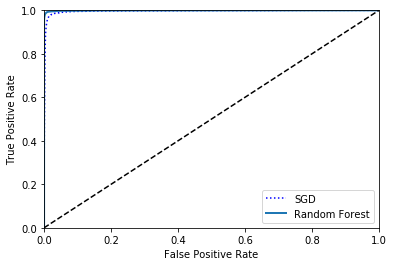

In [281]:
plt.plot(fpr, tpr, "b:", label="SGD") 
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest") 
plt.legend(loc="lower right")
plt.show()

In [282]:
roc_auc_score(y_train_1, y_scores_forest)

0.9992539618878826

In [296]:
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_pred_90, cv=3,method="predict_proba")

In [288]:
precision_score(y_train_1, y_probas_forest[:, 1])

ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [297]:
y_probas_forest

array([[0.  , 1.  ],
       [0.99, 0.01],
       [0.99, 0.01],
       ...,
       [0.  , 1.  ],
       [1.  , 0.  ],
       [1.  , 0.  ]])

In [291]:
y_probas_forest[:, 1]

array([0.99, 0.  , 0.  , ..., 1.  , 0.  , 0.  ])

In [295]:
 y_probas_forest

array([1., 0.])

## Multiclass Classification

### Scikit-Learn detects when you try to use a binary classification algorithm for a multiclass classification task, and it automatically runs OvA (except for SVM classifiers for which it uses OvO). Let’s try this with the SGDClassifier:

In [300]:
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([some_digit])

array([1], dtype=int8)

### Scikit-Learn actually trained 10 binary classifiers, got their decision scores for the image, and selected the class with the highest score.

In [301]:
some_digit_scores = sgd_clf.decision_function([some_digit])
some_digit_scores

array([[-34291.21923509,  13157.50075926,  -5043.2097877 ,
         -2819.62599857, -14538.61452292,  -4814.11694195,
         -9393.42469775, -13157.41478836,    164.44128713,
         -4966.13318291]])

In [302]:
np.argmax(some_digit_scores)

1

In [308]:
sgd_clf.classes_


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int8)

In [309]:
sgd_clf.classes_[1]

1

#### When a classifier is trained, it stores the list of target classes in its classes_ attribute, ordered by value. In this case, the index of each class in the classes_ array conveniently matches the class itself (e.g., the class at index 5 happens to be class 5), but in general you won’t be so lucky.

### Simply create an instance and pass a binary classifier to its constructor. For example, this code creates a multiclass classifier using the OvO strategy, based on a SGDClassifier:

In [311]:
from sklearn.multiclass import OneVsOneClassifier
ovo_clf = OneVsOneClassifier(SGDClassifier(random_state=42))
ovo_clf.fit(X_train, y_train)
ovo_clf.predict([some_digit])
len(ovo_clf.estimators_)


45

In [313]:
forest_clf.fit(X_train, y_train)
forest_clf.predict([some_digit])

array([1], dtype=int8)

In [314]:
 forest_clf.predict_proba([some_digit])

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [315]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.87425, 0.8658 , 0.87435])

### It gets over 84% on all test folds. If you used a random classifier, you would get 10% accuracy, so this is not such a bad score, but you can still do much better. For example, simply scaling the inputs (as discussed in Chapter 2) increases accuracy above 90%:

In [316]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

array([0.90475, 0.898  , 0.90235])

## Error Analysis

In [317]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)

In [318]:
conf_mx = confusion_matrix(y_train, y_train_pred)

In [319]:
conf_mx

array([[5598,    0,   13,    9,   11,   36,   32,    5,  218,    1],
       [   0, 6420,   41,   24,    3,   41,    5,    7,  190,   11],
       [  23,   31, 5250,   89,   72,   23,   68,   39,  354,    9],
       [  27,   22,  115, 5261,    2,  187,   22,   48,  384,   63],
       [  10,   14,   44,   12, 5243,    8,   34,   24,  290,  163],
       [  23,   16,   30,  152,   52, 4482,   79,   17,  506,   64],
       [  28,   19,   52,    2,   43,   84, 5544,    6,  140,    0],
       [  23,   12,   52,   25,   48,   10,    4, 5710,  166,  215],
       [  13,   68,   42,   95,    3,  110,   30,   11, 5433,   46],
       [  21,   18,   25,   58,  121,   29,    1,  177,  338, 5161]])

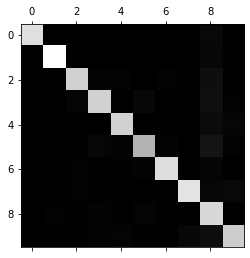

In [321]:
plt.matshow(conf_mx, cmap=plt.cm.gray)

#### This confusion matrix looks fairly good, since most images are on the main diagonal, which means that they were classified correctly. The 5s look slightly darker than the other digits, which could mean that there are fewer images of 5s in the dataset or that the classifier does not perform as well on 5s as on other digits. In fact, you can verify that both are the case.

In [323]:
row_sums = conf_mx.sum(axis=1, keepdims=True) 
norm_conf_mx = conf_mx / row_sums

In [324]:
cl_a, cl_b = 3, 5
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)] 
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)] 
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)] 
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]


## Multilabel Classification

In [327]:
from sklearn.neighbors import KNeighborsClassifier
y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)
knn_clf.predict([some_digit])

array([[False,  True]])

In [328]:
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_train, cv=3)
f1_score(y_train, y_train_knn_pred, average="macro")

0.9682269979441088

## Multioutput Classification

### The last type of classification task we are going to discuss here is called multioutput-multiclass classification (or simply multioutput classification). It is simply a generalization of multilabel classification where each label can be multiclass (i.e., it can have more than two possible values).

##### The line between classification and regression is sometimes blurry, such as in this example. Arguably, predicting pixel intensity is more akin to regression than to classification. Moreover, multioutput systems are not limited to classification tasks; you could even have a system that outputs multiple labels per instance, including both class labels and value labels.

In [329]:
noise = np.random.randint(0, 100, (len(X_train), 784))

In [331]:
X_train_mod = X_train + noise
noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test

In [332]:
knn_clf.fit(X_train_mod, y_train_mod)
clean_digit = knn_clf.predict([X_test_mod[some_index]])
plot_digit(clean_digit)

NameError: name 'some_index' is not defined